<a href="https://colab.research.google.com/github/MELAI-1/MY-PROJECT/blob/main/Climate/Weather_related_Disease_Prediction_%7C_CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# NOTEBOOK.
import kagglehub
orvile_weather_related_disease_prediction_dataset_path = kagglehub.dataset_download('orvile/weather-related-disease-prediction-dataset')

print('Data source import complete.')


Data source import complete.


In [3]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, recall_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve



In [4]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 25.5 MB/s eta 0:00:00


In [5]:
from collections import Counter
import joblib

## Read the data

In [9]:
wd_df = pd.read_csv('/content/Weather-related disease prediction.csv')

In [10]:
wd_df.head()

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826,0.740000,8.289000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628,0.600000,15.236000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800,0.817083,4.291992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254,0.610000,18.009000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162,0.870000,17.916000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Sinusitis


In [11]:
wd_df.tail()

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
5195,91,1,21.714000,0.870000,5.450000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Arthritis
5196,83,0,10.491000,0.920000,9.165000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Stroke
5197,77,0,19.942824,0.744583,9.305129,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
5198,84,0,20.069000,0.850000,17.971000,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
5199,100,1,38.021000,0.750000,18.300000,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,Eczema


In [12]:
wd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5200 non-null   int64  
 1   Gender                   5200 non-null   int64  
 2   Temperature (C)          5200 non-null   float64
 3   Humidity                 5200 non-null   float64
 4   Wind Speed (km/h)        5200 non-null   float64
 5   nausea                   5200 non-null   int64  
 6   joint_pain               5200 non-null   int64  
 7   abdominal_pain           5200 non-null   int64  
 8   high_fever               5200 non-null   int64  
 9   chills                   5200 non-null   int64  
 10  fatigue                  5200 non-null   int64  
 11  runny_nose               5200 non-null   int64  
 12  pain_behind_the_eyes     5200 non-null   int64  
 13  dizziness                5200 non-null   int64  
 14  headache                

In [13]:
wd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5200.0,51.383269,26.625863,1.000000,30.000000,53.0000,74.00000,100.000000
Gender,5200.0,0.511731,0.499910,0.000000,0.000000,1.0000,1.00000,1.000000
Temperature (C),5200.0,19.943117,11.414905,-15.125000,12.184500,20.0175,28.46525,40.996000
Humidity,5200.0,0.744873,0.142860,0.370833,0.624479,0.7500,0.86000,1.000000
Wind Speed (km/h),5200.0,10.708818,5.686331,0.008000,6.414508,10.1525,15.06155,31.303096
nausea,5200.0,0.155385,0.362306,0.000000,0.000000,0.0000,0.00000,1.000000
joint_pain,5200.0,0.065769,0.247902,0.000000,0.000000,0.0000,0.00000,1.000000
abdominal_pain,5200.0,0.040000,0.195978,0.000000,0.000000,0.0000,0.00000,1.000000
high_fever,5200.0,0.101731,0.302323,0.000000,0.000000,0.0000,0.00000,1.000000
chills,5200.0,0.062885,0.242779,0.000000,0.000000,0.0000,0.00000,1.000000


In [14]:
num_rows, num_columns = wd_df.shape

print("Training Data:")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}\n")
print(f"Columns: {wd_df.columns}")

Training Data:
Number of Rows: 5200
Number of Columns: 51

Columns: Index(['Age', 'Gender', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills',
       'fatigue', 'runny_nose', 'pain_behind_the_eyes', 'dizziness',
       'headache', 'chest_pain', 'vomiting', 'cough', 'shivering',
       'asthma_history', 'high_cholesterol', 'diabetes', 'obesity', 'hiv_aids',
       'nasal_polyps', 'asthma', 'high_blood_pressure', 'severe_headache',
       'weakness', 'trouble_seeing', 'fever', 'body_aches', 'sore_throat',
       'sneezing', 'diarrhea', 'rapid_breathing', 'rapid_heart_rate',
       'pain_behind_eyes', 'swollen_glands', 'rashes', 'sinus_headache',
       'facial_pain', 'shortness_of_breath', 'reduced_smell_and_taste',
       'skin_irritation', 'itchiness', 'throbbing_headache', 'confusion',
       'back_pain', 'knee_ache', 'prognosis'],
      dtype='object')


In [15]:
data_duplicates = wd_df.duplicated().sum()
null_sum = wd_df.isnull().sum()

print(f"Number of duplicate rows in data: {data_duplicates}")
print(f"Number of sum of null data: {null_sum}")

Number of duplicate rows in data: 219
Number of sum of null data: Age                        0
Gender                     0
Temperature (C)            0
Humidity                   0
Wind Speed (km/h)          0
nausea                     0
joint_pain                 0
abdominal_pain             0
high_fever                 0
chills                     0
fatigue                    0
runny_nose                 0
pain_behind_the_eyes       0
dizziness                  0
headache                   0
chest_pain                 0
vomiting                   0
cough                      0
shivering                  0
asthma_history             0
high_cholesterol           0
diabetes                   0
obesity                    0
hiv_aids                   0
nasal_polyps               0
asthma                     0
high_blood_pressure        0
severe_headache            0
weakness                   0
trouble_seeing             0
fever                      0
body_aches                 0
sore_t

In [16]:
wd_df['prognosis'].value_counts()

,count
prognosis,
Heart Attack,1013
Migraine,941
Influenza,658
Heat Stroke,338
Malaria,330
Stroke,329
Eczema,327
Dengue,322
Common Cold,321


## Scaling + Labelling + Splitting

In [17]:
X = wd_df.drop('prognosis', axis=1)  # Features
y = wd_df['prognosis']  # Target

In [18]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Label Encoded Values:")
print(y[:10])

decoded_labels = label_encoder.inverse_transform(y_encoded)
print("Decoded Values (Inverse transform):")
print(decoded_labels[:10])

Label Encoded Values:
0    Heart Attack
1       Influenza
2       Influenza
3          Dengue
4       Sinusitis
5       Sinusitis
6    Heart Attack
7          Eczema
8    Heart Attack
9     Common Cold
Name: prognosis, dtype: object
Decoded Values (Inverse transform):
['Heart Attack' 'Influenza' 'Influenza' 'Dengue' 'Sinusitis' 'Sinusitis'
 'Heart Attack' 'Eczema' 'Heart Attack' 'Common Cold']


In [19]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2,
                                                    random_state=42, stratify=y_encoded)

print(f"X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape}")

X_train Shape: (4160, 50), y_train Shape: (4160,)
X_test Shape: (1040, 50), y_test Shape: (1040,)


## CatBoostClassifier

In [26]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [27]:
from catboost import CatBoostClassifier

In [28]:
catboost_model = CatBoostClassifier(iterations=1000,
                                    learning_rate=0.1,
                                    depth=6,
                                    verbose=100,
                                    random_seed=42)

catboost_model.fit(X_train, y_train)

0:	learn: 2.0484243	total: 80.6ms	remaining: 1m 20s
100:	learn: 0.1427905	total: 3.92s	remaining: 34.9s
200:	learn: 0.0723239	total: 8.06s	remaining: 32s
300:	learn: 0.0512953	total: 12.2s	remaining: 28.4s
400:	learn: 0.0387333	total: 17.3s	remaining: 25.9s
500:	learn: 0.0308864	total: 21.4s	remaining: 21.4s
600:	learn: 0.0251547	total: 24.8s	remaining: 16.5s
700:	learn: 0.0211282	total: 29.2s	remaining: 12.4s
800:	learn: 0.0180409	total: 30.7s	remaining: 7.63s
900:	learn: 0.0155976	total: 32.2s	remaining: 3.54s
999:	learn: 0.0137578	total: 33.7s	remaining: 0us


In [29]:
y_pred = catboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.9865

Classification Report:
              precision    recall  f1-score   support

   Arthritis       1.00      1.00      1.00        62
 Common Cold       0.94      0.98      0.96        64
      Dengue       1.00      0.98      0.99        64
      Eczema       1.00      1.00      1.00        65
Heart Attack       1.00      1.00      1.00       203
 Heat Stroke       1.00      0.97      0.99        68
   Influenza       0.97      0.97      0.97       132
     Malaria       1.00      0.98      0.99        66
    Migraine       0.98      0.99      0.99       188
   Sinusitis       1.00      0.98      0.99        62
      Stroke       0.97      0.97      0.97        66

    accuracy                           0.99      1040
   macro avg       0.99      0.99      0.99      1040
weighted avg       0.99      0.99      0.99      1040



In [30]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

roc_auc = roc_auc_score(y_test, catboost_model.predict_proba(X_test), multi_class='ovr')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", roc_auc)

Precision: 0.9867306533214126
Recall: 0.9865384615384616
F1 Score: 0.9865753533594311
AUC-ROC: 0.9998381082832026


In [31]:
conf_matrix

array([[ 62,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  63,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,  63,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,  65,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 203,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,  66,   1,   0,   0,   0,   0],
       [  0,   4,   0,   0,   0,   0, 128,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,  65,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 186,   0,   2],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,  61,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  64]])

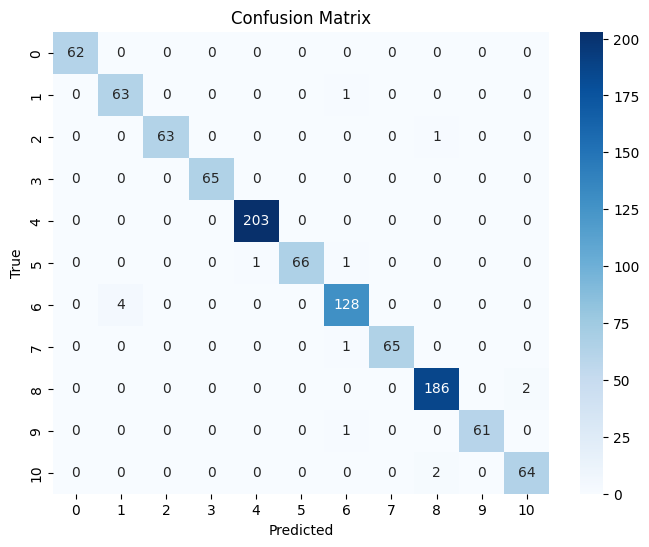

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=catboost_model.classes_, yticklabels=catboost_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

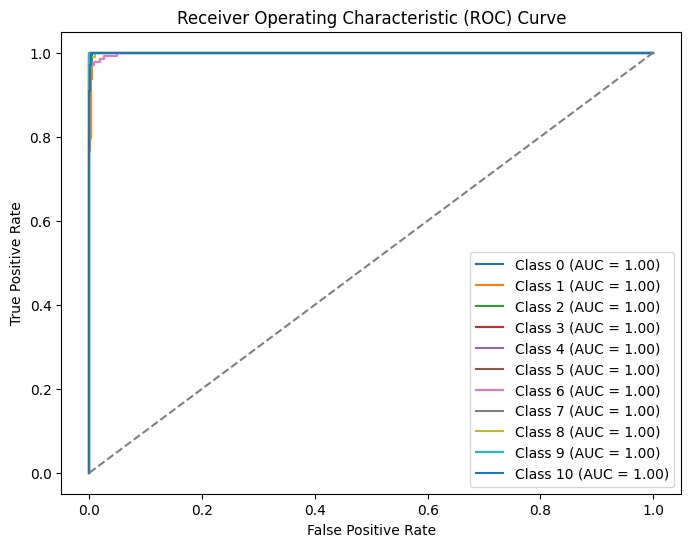

In [33]:
y_prob = catboost_model.predict_proba(X_test)
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(catboost_model.classes_):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=class_label)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score(y_test == class_label, y_prob[:, i]):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Optuna finding best params

In [41]:
!pip install optuna

In [51]:
import optuna

In [44]:
class_counts = Counter(y_encoded)
total_samples = len(y_encoded)
class_weights = {cls: total_samples / (len(class_counts) * count) for cls, count in class_counts.items()}
print("Class Weights:", class_weights)

Class Weights: {np.int64(4): 0.4666606838373867, np.int64(6): 0.7184305056645482, np.int64(2): 1.4680971202710333, np.int64(9): 1.5249266862170088, np.int64(3): 1.4456491520711705, np.int64(1): 1.4726706315491362, np.int64(5): 1.3986013986013985, np.int64(8): 0.502366921070428, np.int64(7): 1.4325068870523416, np.int64(0): 1.5200233849751534, np.int64(10): 1.4368610113290965}


In [45]:
!pip install -q optuna-integration[catboost]

In [46]:
from optuna.integration import CatBoostPruningCallback

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [47]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [48]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

In [52]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_seed': 42,
        'verbose': 0,
        'eval_metric': 'Accuracy'
    }

    model = CatBoostClassifier(**params, class_weights=class_weights)

    pruning_callback = CatBoostPruningCallback(trial, "Accuracy")

    model.fit(
        X_train, y_train,
        eval_set=(X_valid, y_valid),
        early_stopping_rounds=50,
        verbose=0,
        callbacks=[pruning_callback]
    )

    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    return accuracy

study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=10))
study.optimize(objective, n_trials=50)
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", study.best_value)

[I 2025-07-07 22:33:04,873] A new study created in memory with name: no-name-e16eb568-93f3-4931-aea5-0f8f732b0c4e
/tmp/ipython-input-52-14755469.py:15: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")
[I 2025-07-07 22:33:40,273] Trial 0 finished with value: 0.9819711538461539 and parameters: {'iterations': 502, 'learning_rate': 0.014978334164786306, 'depth': 10, 'l2_leaf_reg': 0.19473001674974144, 'border_count': 176}. Best is trial 0 with value: 0.9819711538461539.
/tmp/ipython-input-52-14755469.py:15: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")
[I 2025-07-07 22:33:41,503] Trial 1 finished with value: 0.9807692307692307 and parameters: {'iterations': 915, 'learning_rate': 0.058166709212019815, 'depth': 

Best Hyperparameters: {'iterations': 1191, 'learning_rate': 0.2939514990141346, 'depth': 9, 'l2_leaf_reg': 1.9908010583839606, 'border_count': 145}
Best Accuracy: 0.9831730769230769


In [53]:
best_params = study.best_params
best_params['verbose'] = 100  # Show progress
best_params['random_seed'] = 42
best_params['class_weights'] = class_weights

final_model = CatBoostClassifier(**best_params)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

0:	learn: 1.3381729	total: 49.6ms	remaining: 59s
100:	learn: 0.0249874	total: 4.89s	remaining: 52.7s
200:	learn: 0.0106871	total: 12.1s	remaining: 59.5s
300:	learn: 0.0064365	total: 17.2s	remaining: 50.9s
400:	learn: 0.0045308	total: 22.1s	remaining: 43.5s
500:	learn: 0.0034970	total: 28.2s	remaining: 38.8s
600:	learn: 0.0028505	total: 33s	remaining: 32.4s
700:	learn: 0.0023807	total: 39.1s	remaining: 27.3s
800:	learn: 0.0020327	total: 44s	remaining: 21.4s
900:	learn: 0.0017925	total: 49.7s	remaining: 16s
1000:	learn: 0.0015913	total: 55s	remaining: 10.4s
1100:	learn: 0.0014304	total: 59.8s	remaining: 4.89s
1190:	learn: 0.0012979	total: 1m 6s	remaining: 0us
Final Model Accuracy: 0.9875

Classification Report:
              precision    recall  f1-score   support

   Arthritis       0.98      1.00      0.99        62
 Common Cold       0.95      0.98      0.97        64
      Dengue       1.00      0.97      0.98        64
      Eczema       1.00      1.00      1.00        65
Heart Atta

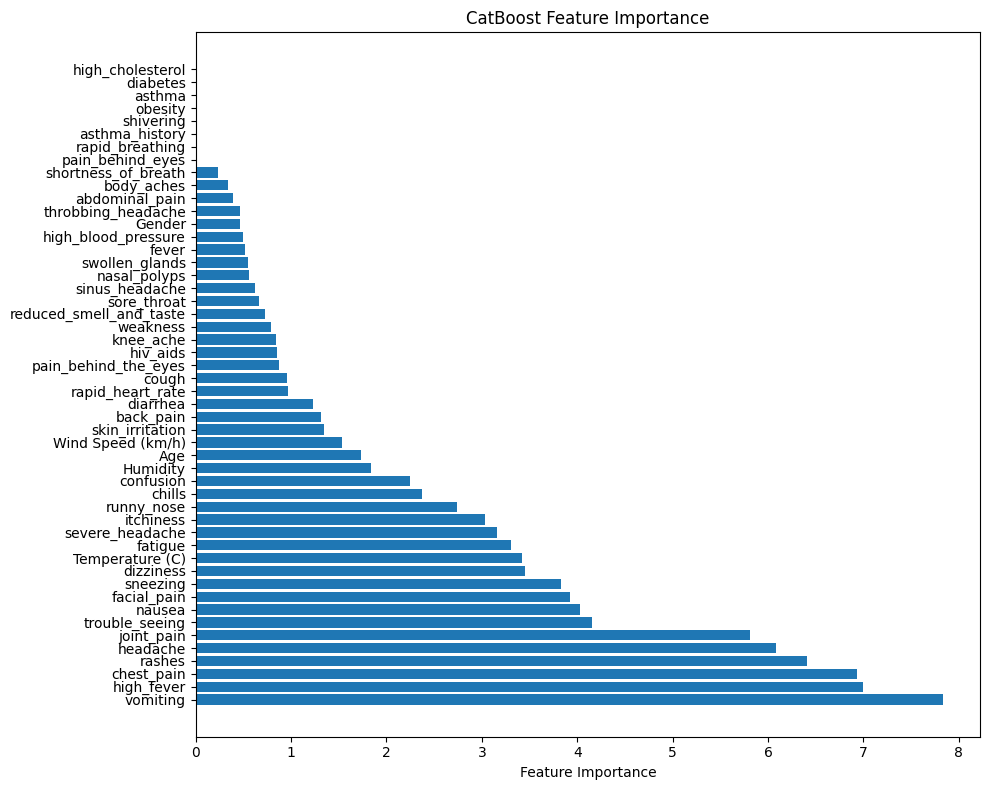

In [54]:
feature_importance = final_model.get_feature_importance()
feature_names = X.columns

plt.figure(figsize=(10, 8))
sorted_idx = np.argsort(feature_importance)[::-1]
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("CatBoost Feature Importance")
plt.tight_layout()
plt.show()

In [55]:
print(confusion_matrix(y_test, y_pred))

[[ 62   0   0   0   0   0   0   0   0   0   0]
 [  0  63   0   0   0   0   1   0   0   0   0]
 [  1   0  62   0   0   0   0   0   1   0   0]
 [  0   0   0  65   0   0   0   0   0   0   0]
 [  0   0   0   0 203   0   0   0   0   0   0]
 [  0   0   0   0   1  67   0   0   0   0   0]
 [  0   3   0   0   0   0 129   0   0   0   0]
 [  0   0   0   0   0   0   1  65   0   0   0]
 [  0   0   0   0   0   0   0   0 186   0   2]
 [  0   0   0   0   0   0   1   0   0  61   0]
 [  0   0   0   0   0   0   1   0   1   0  64]]


In [56]:
final_model.save_model("best_catboost_model.cbm")

In [57]:
import joblib

joblib.dump(final_model, 'catboost_model_optimized.pkl')
joblib.dump(scaler, 'minmax_scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [58]:
model = CatBoostClassifier()
model.load_model("best_catboost_model.cbm")

y_pred = model.predict(X_test)

In [59]:
y_pred

array([[7],
       [6],
       [4],
       ...,
       [9],
       [0],
       [8]])